## Image Classification


Image classification is one of the important use cases in our daily life. Automotive, e-commerce, retail, manufacturing industries, security, surveillance, healthcare, farming etc., can have a wide application of image classification.

**Objective:** In this notebook, we will build a neural network to classifiy the image based on the object present in the image.



## Advanced techniques for training neural networks

Weight Initialization

Nonlinearity (different Activation functions)

Optimizers(different optimizers)

Batch Normalization

Dropout

### About Dataset


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

#### Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot 

### Load dataset

Fashion-MNIST dataset


In [1]:
%tensorflow_version 2.x

In [4]:
import matplotlib.pyplot as plt
import tensorflow 
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [5]:
tensorflow.__version__

'2.7.0'

In [9]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [19]:
X_train.shape[0]

60000

In [14]:
y_train.shape

(60000,)

In [15]:
X_test.shape

(10000, 784)

In [16]:
y_test.shape

(10000,)

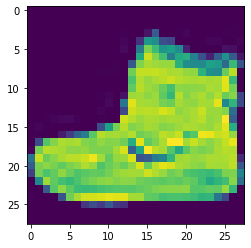

Label:  9


In [10]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])


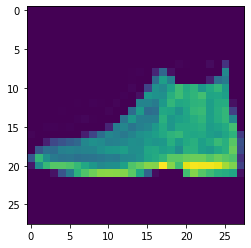

Label:  9


In [11]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

### Data Pre-processing

In [12]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [20]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


### Basic NN model

Naive MLP model without any alterations

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [23]:
model = Sequential()

In [24]:
  model.add(Dense(50, input_shape = (784, )))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(10))
  model.add(Activation('softmax'))

In [27]:
sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
300/300 [==============================] - 3s 4ms/step - loss: 2.3236 - accuracy: 0.0955
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: 2.3010 - accuracy: 0.1249
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2988 - accuracy: 0.1367
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2968 - accuracy: 0.1600
Epoch 5/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2948 - accuracy: 0.2481
Epoch 6/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2927 - accuracy: 0.2335
Epoch 7/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2905 - accuracy: 0.2317
Epoch 8/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2881 - accuracy: 0.2749
Epoch 9/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2854 - accuracy: 0.3074
Epoch 10/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2821 - accura

In [29]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9799 - accuracy: 0.6383


In [30]:
print('Test accuracy: ', results[1])

Test accuracy:  0.6383000016212463


### 1. Weight Initialization

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree

Ref: https://keras.io/initializers/

In [35]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [36]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Epoch 1/100
300/300 [==============================] - 2s 4ms/step - loss: 2.4380 - accuracy: 0.1000
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: 2.3521 - accuracy: 0.1035
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 2.3189 - accuracy: 0.1352
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: 2.3040 - accuracy: 0.1442
Epoch 5/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2964 - accuracy: 0.1612
Epoch 6/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2921 - accuracy: 0.1795
Epoch 7/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2893 - accuracy: 0.2181
Epoch 8/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2873 - accuracy: 0.2481
Epoch 9/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2857 - accuracy: 0.2914
Epoch 10/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2843 - accura

In [37]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.8951 - accuracy: 0.3591


In [38]:
print('Test accuracy: ', results[1])

Test accuracy:  0.35910001397132874


### 2. Nonlinearity (Activation function)

Sigmoid functions suffer from gradient vanishing problem, making training slower

There are many choices apart from sigmoid and tanh; try many of them!

'relu' (rectified linear unit) is one of the most popular ones

Ref: https://keras.io/activations/

In [39]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [40]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1856 - accuracy: 0.6987
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6001 - accuracy: 0.7846
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5343 - accuracy: 0.8074
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4956 - accuracy: 0.8206
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4685 - accuracy: 0.8302
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4479 - accuracy: 0.8364
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4339 - accuracy: 0.8430
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4227 - accuracy: 0.8456
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4116 - accuracy: 0.8496
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.403

In [41]:
results = model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.4554 - accuracy: 0.8322


In [42]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8321999907493591


### 3. Batch Normalization

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity

Ref: https://keras.io/optimizers/

In [43]:
from tensorflow.keras.layers import BatchNormalization, Dropout


Batch normalization layer is usually inserted after dense/convolution and before nonlinearity



In [44]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [45]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 20, verbose = 1)


Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 1.2747 - accuracy: 0.6119
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8264 - accuracy: 0.7469
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6943 - accuracy: 0.7778
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6324 - accuracy: 0.7937
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5886 - accuracy: 0.8047
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5580 - accuracy: 0.8123
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5349 - accuracy: 0.8176
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5157 - accuracy: 0.8249
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5047 - accuracy: 0.8278
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - l

In [46]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4017 - accuracy: 0.8545


In [47]:
print('Test accuracy: ', results[1])


Test accuracy:  0.8544999957084656


### Dropout

In [48]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [49]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8616 - accuracy: 0.7046
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6073 - accuracy: 0.7925
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5473 - accuracy: 0.8136
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5188 - accuracy: 0.8233
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4923 - accuracy: 0.8298
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4757 - accuracy: 0.8383
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4665 - accuracy: 0.8414
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4591 - accuracy: 0.8424
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4470 - accuracy: 0.8445
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [50]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.3940 - accuracy: 0.8557


In [51]:
print('Test accuracy: ', results[1])


Test accuracy:  0.8557000160217285
